In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.DataFrame({'user_id': [1, 2, 1, 3, 3, ],
                   'content_id': [1, 1, 2, 2, 2],
                   'tag': ['cool', 'nice', 'clever', 'clever', 'not-bad']})

In [3]:
df

,user_id,content_id,tag
0,1,1,cool
1,2,1,nice
2,1,2,clever
3,3,2,clever
4,3,2,not-bad


In [4]:
df.groupby('content_id')['tag'].apply(lambda x: ','.join(x)).to_frame()

,tag
content_id,
1,"cool,nice"
2,"clever,clever,not-bad"


### get_group()

**Group by ile gropladiktan sonra grup icinkdei kategorilere ulasabilirsin `get_group()` ile**

In [8]:
tag_group = df.groupby('tag')

In [9]:
tag_group.get_group('clever')

,user_id,content_id,tag
2,1,2,clever
3,3,2,clever


## Groupby sum plot

In [13]:
df = pd.DataFrame({
    'value': [20.45, 22.89, 32.12, 111.22, 33.22, 100.00, 99.99],
    'product': ['table', 'chair', 'chair', 'mobile phone', 'table', 'mobile phone', 'table']
})

In [14]:
df

,value,product
0,20.45,table
1,22.89,chair
2,32.12,chair
3,111.22,mobile phone
4,33.22,table
5,100.00,mobile phone
6,99.99,table


In [27]:
data = df.groupby('product')['value'].sum().to_frame().reset_index().sort_values(by='value')

In [28]:
data

,product,value
0,chair,55.01
2,table,153.66
1,mobile phone,211.22


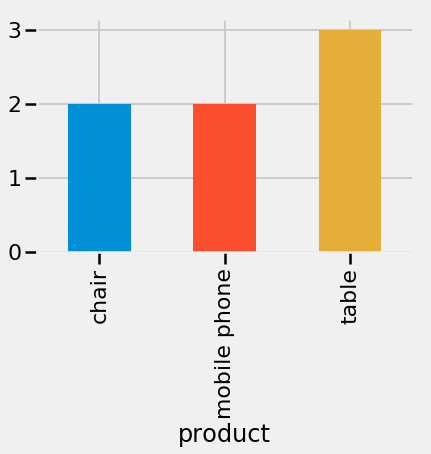

In [29]:
plt.style.use('fivethirtyeight')
sns.set_context('poster')  # notebook
graphic = df.groupby('product').size().plot(kind='bar')

In [30]:
df = pd.DataFrame({
    'value': [20.45, 22.89, 32.12, 111.22, 33.22, 100.00, 99.99],
    'product': ['table', 'chair', 'chair', 'mobile phone', 'table', 'mobile phone', 'table']
})

In [31]:
df

,value,product
0,20.45,table
1,22.89,chair
2,32.12,chair
3,111.22,mobile phone
4,33.22,table
5,100.00,mobile phone
6,99.99,table


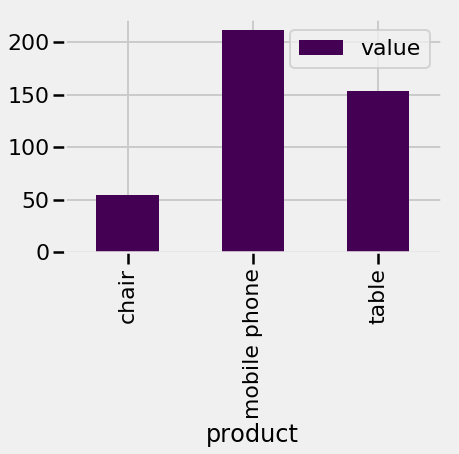

In [46]:
df.groupby('product').sum().plot(kind='bar', cmap='viridis');

## Flatten Hierarchical Indices

In [38]:
df = pd.DataFrame({
    'value': [20.45, 22.89, 32.12, 111.22, 33.22, 100.00, 99.99],
    'product': ['table', 'chair', 'chair', 'mobile phone', 'table', 'mobile phone', 'table']
})

In [41]:
df = df[['product', 'value']]
df

,product,value
0,table,20.45
1,chair,22.89
2,chair,32.12
3,mobile phone,111.22
4,table,33.22
5,mobile phone,100.00
6,table,99.99


In [42]:
grouped_df = df.groupby('product').agg({'min', 'max', 'mean'})

In [43]:
grouped_df

value                
                 mean     max     min
product                              
chair          27.505   32.12   22.89
mobile phone  105.610  111.22  100.00
table          51.220   99.99   20.45

We got a hierarchical columns and want to convert into simpler format

In [44]:
grouped_df.columns = ['_'.join(col).strip() for col in grouped_df.columns]

In [45]:
grouped_df.reset_index()

,product,value_mean,value_max,value_min
0,chair,27.505,32.12,22.89
1,mobile phone,105.610,111.22,100.00
2,table,51.220,99.99,20.45


## Iterate Over DF groupby

In [48]:
for key,group_df in df.groupby('product'):

    # `key` contains the name of the grouped element 
    # i.e. 'chair', 'mobile phone', 'table'

    # `group_df` is a normal dataframe
    # containing only the data referring to the key

    print(f"the group for product '{key}' has {len(group_df)} rows")  

# >>>
# the group for product 'chair' has 2 rows
# the group for product 'mobile phone' has 2 rows
# the group for product 'table' has 3 rows


the group for product 'chair' has 2 rows
the group for product 'mobile phone' has 2 rows
the group for product 'table' has 3 rows
